In [3]:
!pip install featuretools

  Using cached featuretools-1.31.0-py3-none-any.whl.metadata (15 kB)
  Using cached holidays-0.64-py3-none-any.whl.metadata (26 kB)
  Using cached woodwork-0.31.0-py3-none-any.whl.metadata (10 kB)
Using cached featuretools-1.31.0-py3-none-any.whl (587 kB)
Using cached holidays-0.64-py3-none-any.whl (1.2 MB)
Using cached woodwork-0.31.0-py3-none-any.whl (215 kB)


In [25]:
# Import libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import featuretools as ft

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:

df['id'] = range(1, len(df) + 1)

# Convert the dataset into an EntitySet
es = ft.EntitySet(id="california_housing")

# Add the DataFrame as an entity
es.add_dataframe(
    dataframe_name="housing_data",
    dataframe=df,
    index="id",  # Use the 'id' column as the unique index
)

Entityset: california_housing
  DataFrames:
    housing_data [Rows: 20640, Columns: 10]
  Relationships:
    No relationships

In [28]:
# Perform Deep Feature Synthesis (DFS)
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="housing_data",
    agg_primitives=["mean", "sum", "max", "min", "std"],  # Aggregation functions
    trans_primitives=["multiply_numeric", "divide_numeric", "absolute"],  # Transformations
)

# Display the generated feature matrix
print("\nFeature Matrix:")
feature_matrix.head()

# Save feature definitions for future use (optional)
# ft.save_features(feature_defs, "features.json")



Feature Matrix:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ABSOLUTE(AveBedrms),...,Latitude * Longitude,Latitude * MedHouseVal,Latitude * MedInc,Latitude * Population,Longitude * MedHouseVal,Longitude * MedInc,Longitude * Population,MedHouseVal * MedInc,MedHouseVal * Population,MedInc * Population
id,,,,,,,,,,,,,,,,,,,,,
1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.023810,...,-4630.0724,171.44488,315.358576,12197.36,-553.21298,-1017.589196,-39358.06,37.679855,1457.372,2680.7144
2,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.971880,...,-4627.2492,135.72810,314.291004,90901.86,-438.15870,-1014.597108,-293450.22,29.760519,8607.585,19931.6614
3,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.073446,...,-4626.7840,133.26985,274.692590,18773.60,-430.40704,-887.144576,-60631.04,25.553305,1746.416,3599.6704
4,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.073059,...,-4627.1625,129.18205,213.591335,21120.30,-417.23925,-689.868975,-68215.50,19.259900,1904.454,3148.8498
5,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.081081,...,-4627.1625,129.52270,145.578670,21385.25,-418.33950,-470.197950,-69071.25,13.161696,1933.430,2173.1030


In [16]:
!pip install pycaret

In [2]:
!pip install pandas

In [3]:
!pip install scikit-learn

In [4]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from pycaret.regression import *

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Add target column name for better clarity
df['target'] = df['MedHouseVal']
df.drop(columns=['MedHouseVal'], inplace=True)

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Initialize PyCaret regression setup
regression_setup = setup(
    data=train_data,
    target='target',
    session_id=42,
    normalize=True,  # Optional: normalize data
)



,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(16512, 9)"
4,Transformed data shape,"(16512, 9)"
5,Transformed train set shape,"(11558, 9)"
6,Transformed test set shape,"(4954, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [8]:
# Compare and select the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3165,0.2255,0.4741,0.8301,0.1437,0.1789,0.1990
et,Extra Trees Regressor,0.3405,0.2661,0.5151,0.7995,0.1521,0.1894,0.8020
rf,Random Forest Regressor,0.3402,0.2695,0.5185,0.7969,0.1536,0.1897,1.3980
gbr,Gradient Boosting Regressor,0.3705,0.2892,0.5370,0.7820,0.1640,0.2124,0.6850
knn,K Neighbors Regressor,0.4411,0.4200,0.6476,0.6833,0.1923,0.2423,0.0550
dt,Decision Tree Regressor,0.4669,0.5331,0.7293,0.5981,0.2121,0.2490,0.0390
ada,AdaBoost Regressor,0.6999,0.6945,0.8301,0.4762,0.2797,0.5089,0.2330
omp,Orthogonal Matching Pursuit,0.6255,0.7006,0.8366,0.4716,0.2606,0.3849,0.0180
en,Elastic Net,0.8113,1.0572,1.0280,0.2028,0.3234,0.5491,0.0110
lasso,Lasso Regression,0.9105,1.3269,1.1517,-0.0007,0.3616,0.6200,0.0130


In [10]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3358,0.2532,0.5032,0.8116,0.1502,0.1868
1,0.3140,0.2143,0.4629,0.8431,0.1411,0.1762
2,0.3290,0.2465,0.4964,0.8176,0.1523,0.1974
3,0.3065,0.2008,0.4481,0.8517,0.1385,0.1710
4,0.3015,0.1944,0.4409,0.8436,0.1375,0.1733
5,0.3337,0.2801,0.5292,0.7935,0.1610,0.1957
6,0.3050,0.2234,0.4726,0.8328,0.1398,0.1744
7,0.3120,0.2189,0.4679,0.8394,0.1401,0.1745
8,0.3058,0.2057,0.4536,0.8371,0.1364,0.1660


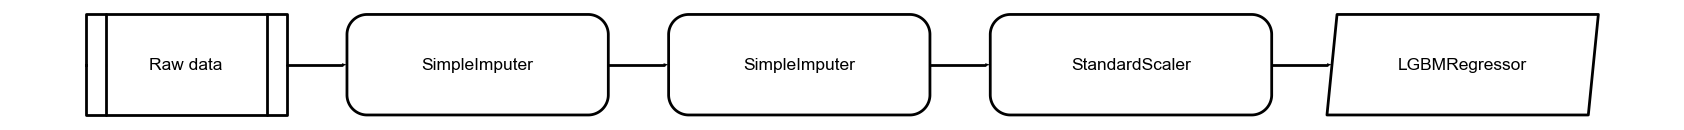

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# Fine tuning the model 
evaluate_model(lightgbm_model)

In [15]:
# Finalize the model (retrain on full training data)
final_model = finalize_model(best_model)

# Evaluate on test data
predictions = predict_model(final_model, data=test_data)

# Display predictions
print(predictions.head())

# Save the model for future use
save_model(final_model, 'best_regression_model')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3054,0.2114,0.4598,0.8387,0.1396,0.1771


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437  36.060001   
3024   2.5313      30.0  5.039383   1.193493      1565.0  2.679795  35.139999   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332  37.799999   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444  34.279999   
9814   3.7250      34.0  5.492990   1.028037      1063.0  2.483645  36.619999   

        Longitude   target  prediction_label  
20046 -119.010002  0.47700          0.585590  
3024  -119.459999  0.45800          0.855531  
15663 -122.440002  5.00001          4.706051  
20484 -118.720001  2.18600          2.334675  
9814  -121.930000  2.78000          2.502199  
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=42))]),
 'best_regression_model.pkl')

In [1]:
print("Your model has been saved..!")

Your model has been saved..!
